In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud
from collections import Counter #빈도분석
import matplotlib.pyplot as plt #시각화 해주는 라이브러리

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from tqdm import tqdm_notebook as tqdm

In [4]:
from bs4 import BeautifulSoup as bs
import requests as req

In [6]:
import pickle
from PIL import Image
import numpy as np

In [162]:
stopwords = ['있다','하다','되다']

def extract_noun(string):
        nouns = okt.nouns(string)
        return nouns

def extract_Adjective(string):
    Adjective = okt.pos(string)
    Adjective_list = []
    for word, tag in Adjective:
        if((tag in 'Adjective') and (word not in stopwords) ):
            Adjective_list.append(word)
    return Adjective_list

def extract_Verb(string):
    Verb = okt.pos(string, stem=True, norm=True)
    Verb_list = []
    for word, tag in Verb:
        if((tag in 'Verb') and (word not in stopwords)):
            Verb_list.append(word)  
    return Verb_list

def extract_word(string):
    noun = extract_noun(string)
    Adjective = extract_Adjective(string)
    Verb = extract_Verb(string)
    word_list = []
    for i in noun+Adjective+Verb:
        word_list.append(i) 
    return word_list

In [7]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [8]:
driver.maximize_window()

In [78]:
driver.get('https://www.16personalities.com/ko/%EC%84%B1%EA%B2%A9%EC%9C%A0%ED%98%95-infj')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=105.0.5195.127)


In [41]:
mbti = pd.read_csv('mbti16가지유형_추가설명 - mbti16가지유형_추가설명.csv',encoding='utf-8')
mbti

,Unnamed: 0,제목,mbti,상세설명
0,0,전략가,INTJ-A / INTJ-T,성격유형 : “전략가”사고 능력은 인간의 위대한 점 중 하나이다. 인간은 갈대처럼 ...
1,1,논리술사,INTP-A / INTP-T,성격유형 : “논리술사”질문하는 일을 멈추지 않는 것이 중요하다. 호기심은 그 자체...
2,2,통솔자,ENTJ-A / ENTJ-T,성격유형 : “통솔자”당신의 시간은 유한하다. 그러니 다른 사람의 삶을 사느라 시간...
3,3,변론가,ENTP-A / ENTP-T,성격유형 : “변론가”변론가(ENTP)는 두뇌 회전이 빠르고 대담한 성격으로 현재 ...
4,4,옹호자,INFJ-A / INFJ-T,"성격유형 : “옹호자”사람을 대할 때는 그 사람의 잠재력을 봐야 하며, 다른 사람들..."
5,5,중재자,INFP-A / INFP-T,"소개중재자(INFP)는 언뜻 보기에 조용하고 자신을 내세우지 않는 것처럼 보이지만,..."
6,6,선도자,ENFJ-A / ENFJ-T,성격유형 : “선도자”선도자(ENFJ)는 삶에서 위대한 사명을 위해 힘써야 한다는 ...
7,7,활동가,ENFP-A / ENFP-T,성격유형 : “활동가”당신이 생계를 위해 어떤 일을 하는지는 관심이 없다. 당신이 ...
8,8,현실주의자,ISTJ-A / ISTJ-T,성격유형 : “현실주의자”자신에게 주어진 능력을 활용하지 않는 것을 두려워해야 한다...
9,9,장인,ISTP-A / ISTP-T,성격유형 : “장인”나는 다른 삶을 살고 싶었다. 매일 똑같은 곳에서 똑같은 사람을...


In [51]:
import pickle

In [52]:
from konlpy.tag import Okt
okt = Okt()

In [109]:
a = mbti.iloc[4,3]
a

'성격유형 : “옹호자”사람을 대할 때는 그 사람의 잠재력을 봐야 하며, 다른 사람들이 잠재력을 발휘할 수 있도록 도와야 한다.요한 볼프강 폰 괴테옹호자(INFJ)는 매우 희귀한 성격임에도 불구하고 세상에 큰 영향력을 발휘하곤 합니다. 이들은 이상주의적이고 원칙주의적인 성격으로, 삶에 순응하는 대신 삶에 맞서 변화를 만들어 내고자 합니다. 이들에게 성공이란 돈이나 지위가 아니라 자아를 실현하고 다른 사람을 도우며 세상에서 선을 실천하는 일입니다.원대한 목표와 야망을 품고 있다고 해서 옹호자가 몽상가와 같은 성격이라는 뜻은 아닙니다. 이들은 원칙과 완벽함을 중시하며 자신이 옳다고 믿는 일을 끝내기 전에는 만족하지 않습니다. 또한 매우 양심적인 성격으로 자신의 확실한 가치관에 따라 인생을 살아가며, 다른 사람이나 사회의 가치를 따르는 대신 자신의 지혜와 직관을 통해 정말로 중요한 가치를 찾기 위해 노력합니다.목적 중시옹호자는 매우 희귀한 성격으로 대부분의 사람과는 다른 분위기를 풍기곤 합니다. 이들은 내면에 깊이 집중하며 인생의 목표를 찾으려는 강한 욕구를 지니고 있기에 주변 사람들과 어울리지 못할 때가 있습니다. 그렇다고 다른 사람들과 깊은 관계를 맺을 수 없다는 의미는 아닙니다. 다만 가끔씩 세상이 자신을 이해하지 못하거나 세상과 자신의 의견이 다르다고 느낄 때가 있기는 합니다.옹호자는 세상을 더 나은 곳으로 만들기 위해 최선을 다합니다. 이들은 불평등을 싫어하며 자신의 이익보다는 남을 돕는 일에 더욱 집중하곤 합니다. 또한 창의력과 상상력과 세심함 등 자신의 강점을 다른 사람을 돕는 일에 활용해야 한다는 사명감을 느낄 때가 많습니다.옹호자는 다른 사람의 삶을 더 낫게 만드는 일에서 깊은 만족감을 느낍니다.많은 옹호자는 다른 사람을 돕는 일을 인생의 사명으로 생각하며 정의를 추구할 방법을 찾습니다. 이들은 사회의 본질적인 문제를 해결하고 부당함을 해소하려는 열망이 있습니다. 그러나 가끔은 자신을 돌보는 대신 이상에만 집중하느라 스트레스나 번아웃으로 고생할 때도

In [108]:
b = mbti.iloc[5,3]
b

'소개중재자(INFP)는 언뜻 보기에 조용하고 자신을 내세우지 않는 것처럼 보이지만, 사실은 에너지와 열정이 넘치는 마음을 지닌 성격입니다. 이들은 창의적이고 상상력이 뛰어나며 몽상을 즐기는 성격으로, 머릿속에서 수많은 이야기를 만들어 내곤 합니다. 또한 음악과 예술과 자연에 대한 감수성이 뛰어나며 다른 사람의 감정을 빠르게 알아차리곤 합니다.중재자는 이상주의적이고 공감 능력이 높으며, 깊고 의미 있는 관계를 원하고 다른 사람을 도와야 한다는 사명감을 느끼곤 합니다. 그러나 전체 인구에서 큰 비중을 차지하지 않는 성격이기 때문에 외로움을 느끼거나 존재감을 드러내지 못하는 때가 있으며, 자신의 독특한 강점을 인정하지 않는 세상에서 방황하는 느낌을 받을 수도 있습니다.금이라 해서 다 반짝이는 것이 아니니, 방황하는 자가 모두 길을 잃은 것은 아니다. 오래되었어도 강한 것은 시들지 않으니, 깊은 뿌리에는 서리가 닿지 못한다.J. R. R. 톨킨높은 공감 능력중재자는 인간의 본성에 대한 깊은 호기심을 지니고 있습니다. 이들은 자기 성찰적인 성격으로 자기 생각과 감정에 집중합니다. 하지만 동시에 주변 사람들을 이해하고자 하는 욕구도 지니고 있습니다. 이들은 공감 능력이 높고 항상 다른 사람의 이야기를 편견 없이 들을 준비가 되어 있으며, 상대방의 이야기를 경청하고 상대방에게 도움이 될 수 있다는 사실에서 만족감을 느낍니다.중재자에게 이상적인 관계란 꿈과 희망뿐만 아니라 남들에게 말하지 못한 두려움이나 약점을 편안하게 공유할 수 있는 사이를 말합니다.공감 능력은 중재자의 가장 큰 재능이지만 가끔씩은 단점이 되기도 합니다. 높은 공감 능력 때문에 다른 사람의 부정적인 감정이나 사고방식에 쉽게 영향을 받기 때문입니다. 선을 확실히 정하지 않는다면 주변의 수많은 문제에 신경쓰느라 상당한 스트레스를 받게 될 수 있습니다.솔직함 추구중재자는 다른 사람인 척하는 일을 매우 불편해합니다. 이들은 민감하고 솔직함을 중시하는 성격으로, 창의적인 방식으로 자신을 표현할 기회를 원합니다. 

In [107]:
c = mbti.iloc[6,3]
c

'성격유형 : “선도자”선도자(ENFJ)는 삶에서 위대한 사명을 위해 힘써야 한다는 느낌을 받곤 합니다. 사려 깊고 이상주의적 성향을 지닌 선도자는 다른 사람과 주변 세상에 긍정적인 영향력을 발휘하기 위해 최선을 다하며, 어려운 상황에서도 올바른 일을 할 기회를 마다하지 않습니다.선도자는 타고난 지도자라고 할 수 있으며 많은 선도자가 정치인, 코치, 교사로 활동하고 있습니다. 이들의 열정과 카리스마는 직업뿐만 아니라 인간관계 등 삶의 다양한 측면에서 다른 사람에게 영향을 주곤 합니다. 또한 이들은 친구와 사랑하는 사람이 발전할 수 있도록 돕는 일에서 즐거움과 깊은 만족감을 느낍니다.모두가 침묵하는 세상에서는 한 사람의 목소리도 강력한 힘을 발휘한다.말랄라 유사프자이올바른 일에 앞장서는 사람선도자는 진실함과 이타주의 등 자신의 가치관을 적극적으로 설파하며, 부당하거나 잘못된 일이라고 생각이 되면 이에 반대의 목소리를 냅니다. 그러나 보통은 성급하게 자기 생각을 강요하기보다는 세심함과 통찰력으로 다른 사람의 공감을 이끌어내는 방법을 선택할 때가 많습니다.선도자는 다른 사람의 의도와 믿음을 간파하는 데 놀라운 소질이 있으며, 가끔씩은 자신도 눈치채지 정도로 빠르게 다른 사람의 생각과 감정을 파악하곤 합니다. 이렇게 번뜩이는 통찰력은 남을 설득하고 다른 사람에게 의욕을 불어넣는 데 큰 도움이 됩니다.다른 사람의 생각을 바꾸기란 쉽지 않은 일입니다. 그러나 선도자에게는 다른 사람을 변화시킬 충분한 능력이 있습니다.선도자는 선한 의도를 지닌 성격으로, 다른 사람을 조종하거나 권력을 얻고자 하는 욕망보다는 올바른 일을 하고자 하는 진실한 소망에 따라 행동합니다. 또한 자신과 생각이 다르더라도 상대방과 자신 사이에 공통점을 찾으려고 노력하며, 자신의 가치관에 대해 세심한 태도로 소통함으로써 상대방에게 감동을 주곤 합니다.이타주의적 성향선도자는 자신이 아끼는 사람의 문제를 해결하기 위해 헌신하며, 사람들은 선도자의 도움과 조언에 감사함을 느끼곤 합니다. 이 때문에 선도자는 다

In [265]:
stopwords = ['있다.','하다','되다','고','말','며','등','것','이',"전",'않다','자신','사람','가다','있습니다',"매우","때","이러한","입니다","가가","때문","아닙니다","수","수도","있는","또한","있을","많은","있으며","다른","아니라","술사","니","감","곤","데","거나","없는","지니","위","위해","없습니다"]

In [266]:
def extract_Noun(string):
    Nouns = okt.pos(string)
    Nouns_list = []
    for word, tag in Nouns:
        if((tag in 'Noun') and (word not in stopwords) ):
            Nouns_list.append(word)
    return Nouns_list

# def extract_noun(string):
#     nouns = okt.nouns(string)
#     return nouns

def extract_Adjective(string):
    Adjective = okt.pos(string)
    Adjective_list = []
    for word, tag in Adjective:
        if((tag in 'Adjective') and (word not in stopwords) ):
            Adjective_list.append(word)
    return Adjective_list

def extract_Verb(string):
    Verb = okt.pos(string, stem=True, norm=True)
    Verb_list = []
    for word, tag in Verb:
        if((tag in 'Verb') and (word not in stopwords)):
            Verb_list.append(word)  
    return Verb_list

def extract_word(string):
    Noun = extract_Noun(string)
    Adjective = extract_Adjective(string)
    Verb = extract_Verb(string)
    word_list = []
    for i in Noun+Adjective+Verb:
        word_list.append(i) 
    return word_list

# def extract_word(string):
#     noun = extract_noun(string)
#     Adjective = extract_Adjective(string)
#     Verb = extract_Verb(string)
#     word_list = noun + Adjective + Verb
#     return word_list

In [267]:
text_data = extract_word(a)
text_data1 = extract_word(b)
text_data2 = extract_word(c)
print(text_data), print(text_data1), print(text_data2)

['성격', '유형', '옹호', '그', '잠재력', '잠재력', '발휘', '도', '요한', '볼프강', '폰', '괴테', '옹호', '희귀', '성격', '임', '불구', '세상', '영향력', '발', '이상주의', '원칙', '주의', '성격', '삶', '순응', '대신', '삶', '변화', '고자', '성공', '돈', '지위', '자아', '실현', '도우', '세상', '선', '실천', '일', '목표', '야망', '옹호', '몽상가', '성격', '뜻', '원칙', '중시', '일', '끝내기', '양심', '성격', '가치관', '인생', '사회', '가치', '대신', '지혜', '직관', '통해', '가치', '찾기', '노력', '목적', '중시', '옹호', '희귀', '성격', '대부분', '분위기', '내면', '깊이', '집중', '인생', '목표', '욕구', '주변', '관계', '의미', '다만', '가끔', '세상', '이해', '못', '세상', '의견', '옹호', '세상', '더', '나은', '곳', '만들기', '최선', '다합', '불평등', '이익', '남', '일', '더욱', '집중', '창의력', '상상력', '세심', '함', '강점', '일', '활용', '명감', '옹호', '삶', '더', '낫', '일', '만족감', '옹호', '일', '인생', '사명', '생각', '정의', '추구', '방법', '사회', '본질', '문제', '해결', '해소', '열망', '가끔', '대신', '이상', '집중', '스트레스', '번', '아웃', '고생', '소통', '추구', '옹호', '향', '성향', '사람과', '깊이', '관계', '사람과', '서로', '일', '행복감', '잡담', '의미', '대화', '추구', '세심', '방식', '소통', '태도', '통찰', '주변', '인상', '옹호', '소수', '관계', '행복감', '옹호', '사려', '공감', '능력', '관

(None, None, None)

In [268]:
count = Counter(text_data)
count = pd.Series(count)
count = count.sort_values(ascending=False).head(30)
count1 = Counter(text_data1)
count1 = pd.Series(count1)
count1 = count1.sort_values(ascending=False).head(30)
count2 = Counter(text_data2)
count2 = pd.Series(count2)
count2 = count2.sort_values(ascending=False).head(30)

In [269]:
mask_image = np.array(Image.open('C:\Study\Teamproject\\first\향수1.jfif'))

In [275]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\\batang.ttc',
                        width = 700,
                        height = 700,
                        background_color = 'white',
                        colormap = 'spring',
                        mask = mask_image,
                        random_state = 1).generate_from_frequencies(count2)
                        # count : INFJ, count1 : INFP, count2:ENFJ

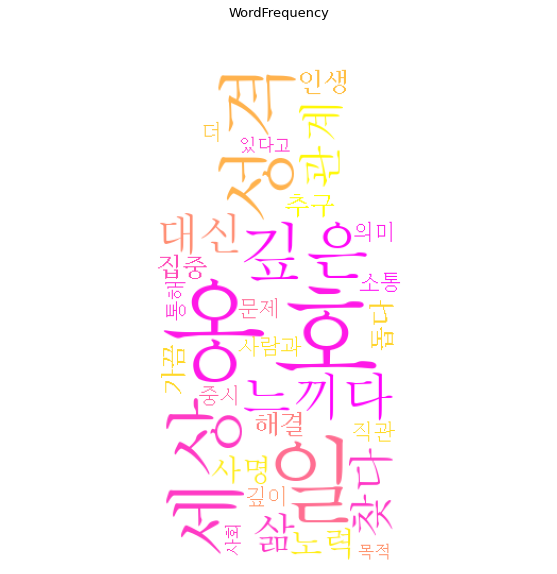

In [272]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordFrequency", size = 13)
plt.show
plt.savefig('INFJ.png')

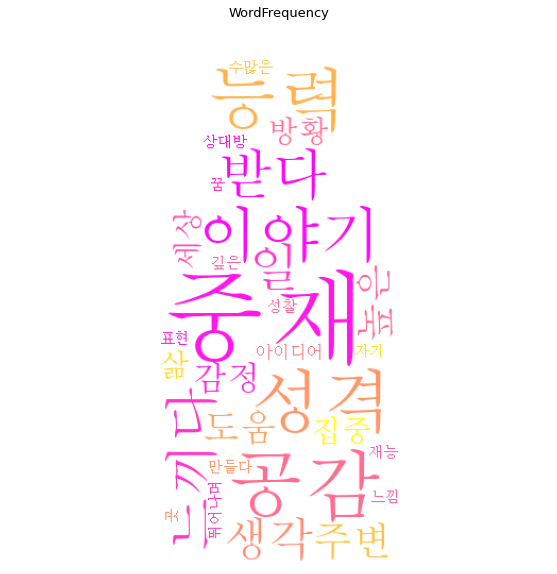

In [274]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordFrequency", size = 13)
plt.show
plt.savefig('INFP.png')

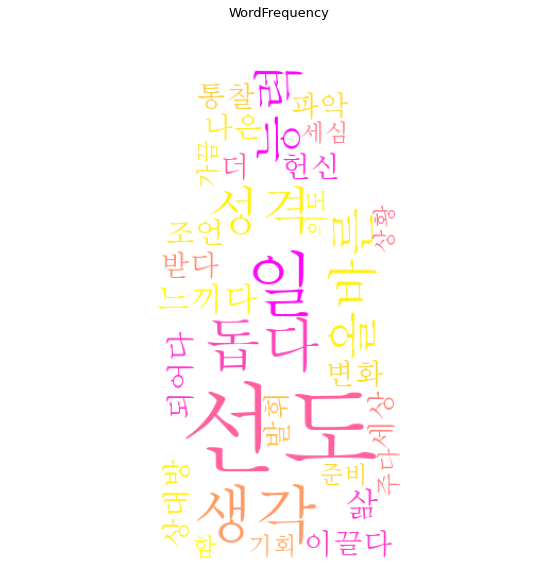

In [276]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordFrequency", size = 13)
plt.show
plt.savefig('ENFJ.png')